# Analyse BSPF - PSD

With pressure sensor parascientific and new sensor 

In [1]:
import os 
import obspy as obs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
config = {}

In [3]:
config['datapath_bspf'] = "/home/andbro/Downloads/tmp/BSPF/HJ*.D/*.278"

config['inventory'] = obs.read_inventory("/home/andbro/Documents/LMU_Docs/USA/BlueSeis/PY.BSPF.XX.xml")
# config['inventory'] = obs.read_inventory("/home/andbro/Documents/LMU_Docs/USA/BlueSeis/PY.BSPF.xml")

/home/andbro/anaconda3/envs/obs/lib/python3.7/site-packages/obspy/io/stationxml/core.py:98: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  version, ", ".join(READABLE_VERSIONS)))


3 Trace(s) in Stream:
PY.BSPF.XX.HJ1 | 2022-10-05T00:00:00.517400Z - 2022-10-06T00:00:00.542400Z | 200.0 Hz, 17280006 samples
PY.BSPF.XX.HJ2 | 2022-10-05T00:00:00.517400Z - 2022-10-06T00:00:00.542400Z | 200.0 Hz, 17280006 samples
PY.BSPF.XX.HJ3 | 2022-10-05T00:00:00.517400Z - 2022-10-06T00:00:00.542400Z | 200.0 Hz, 17280006 samples


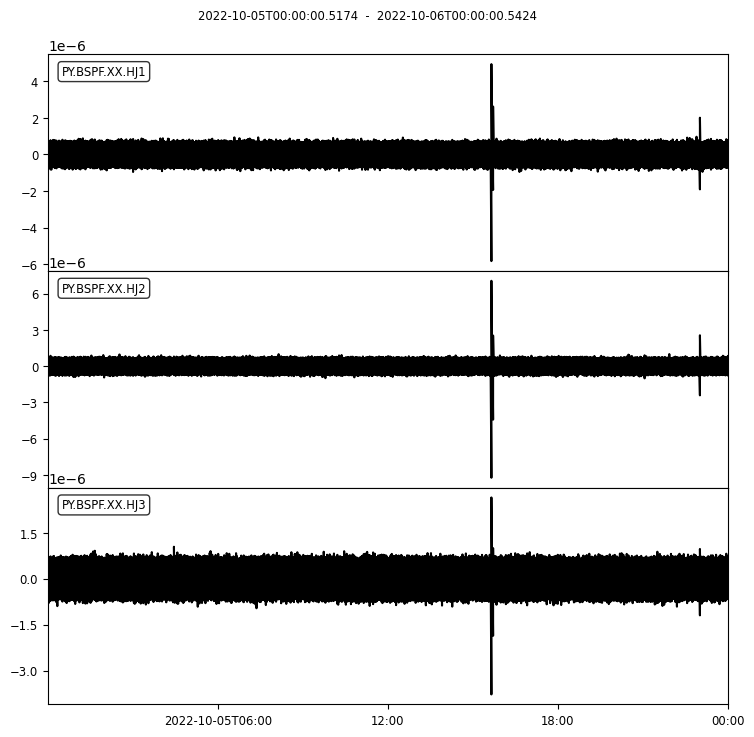

In [4]:
## read data stream using obspy routine
st0 = obs.read(config['datapath_bspf'], format="MSEED")


## merge traces that might be split due to data gaps or overlaps
st0.merge(fill_value="interpolate")

## remove mean
st0.detrend("demean")

## renove sensitivity
st0.remove_sensitivity(config['inventory'])

## show all traces in data stream
print(st0)
st0.plot(equal_scale=False);

## Plot PSD

In [8]:
st0.taper(0.01)

3 Trace(s) in Stream:
PY.BSPF.XX.HJ3 | 2022-10-05T00:00:00.517400Z - 2022-10-06T00:00:00.542400Z | 200.0 Hz, 17280006 samples
PY.BSPF.XX.HJ2 | 2022-10-05T00:00:00.517400Z - 2022-10-06T00:00:00.542400Z | 200.0 Hz, 17280006 samples
PY.BSPF.XX.HJ1 | 2022-10-05T00:00:00.517400Z - 2022-10-06T00:00:00.542400Z | 200.0 Hz, 17280006 samples

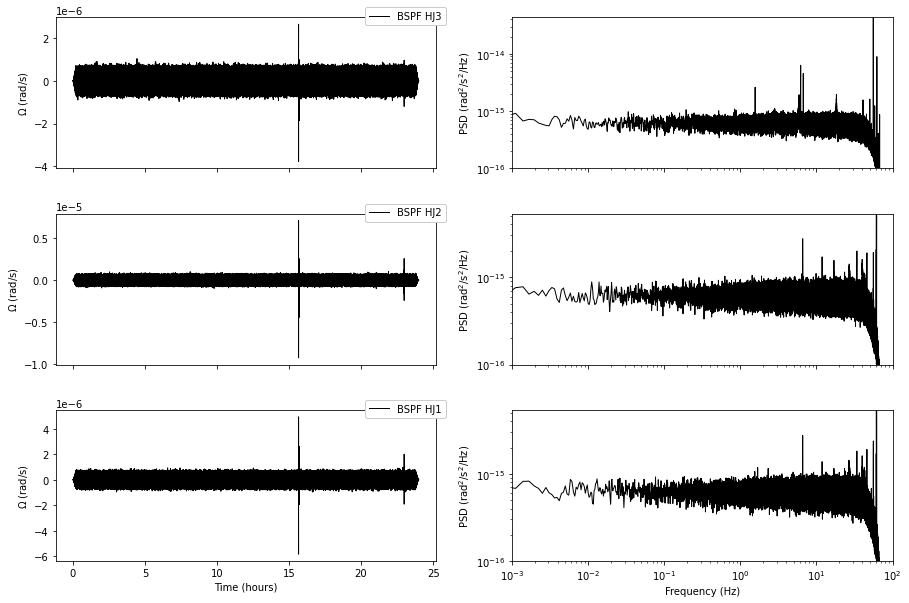

In [9]:
def __makeplotStreamPSD2(st, config):

    from scipy import fftpack
    from numpy import abs, log10
    from scipy.signal import welch, hann

    out = []

    nblock =  200*3600
    overlap = None
    win = hann(nblock, True)

    NN = len(st)
    
    fig, axes = plt.subplots(NN,2,figsize=(15,10), sharex='col')

    plt.subplots_adjust(hspace=0.3)

    ## _______________________________________________

    st.sort(keys=['channel'], reverse=True)
    
    for i, tr in enumerate(st):

        ff, Pxx = welch(tr.data, fs=tr.stats.sampling_rate, 
                        window=win, noverlap=overlap, nfft=nblock,
                        scaling="density",
                        return_onesided=True)

        out.append(Pxx)
        
        ## _________________________________________________________________
        axes[i,0].plot(
                    tr.times()/3600,
                    tr.data,
                    color='black',
                    label='{} {}'.format(tr.stats.station, tr.stats.channel),
                    lw=1.0,
                    )


        ## _________________________________________________________________
        axes[i,1].loglog(
                    ff,
                    Pxx,
                    color='black',
                    lw=1.0,
                    )
        
#         axes[i,1].vlines(1/86400,min(Pxx[:]), max(Pxx[:]), color="darkgrey", alpha=1.0, zorder=0)
#         axes[i,1].vlines(2/86400,min(Pxx[:]), max(Pxx[:]), color="darkgrey", alpha=1.0, zorder=0)
        
        axes[NN-1,0].set_xlabel("Time (hours)")
        axes[NN-1,1].set_xlabel("Frequency (Hz)")
        
        axes[i,1].set_ylim(min(Pxx[:]), max(Pxx[:]))
        
        axes[i,0].set_ylabel(r'$\Omega$ (rad/s)')    
        axes[i,1].set_ylabel(r'PSD (rad$^2$/s$^2$/Hz)')        
        axes[i,0].legend(loc='upper left',bbox_to_anchor=(0.8, 1.10), framealpha=1.0)
#         axes[i,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#         axes[i,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

        axes[i,1].set_xlim(1e-3,1e2)
        axes[i,1].set_ylim(bottom=1e-16)

    out.append(ff)
    
    return fig, out

fig, out = __makeplotStreamPSD2(st0, config);

## Plot Helicorder

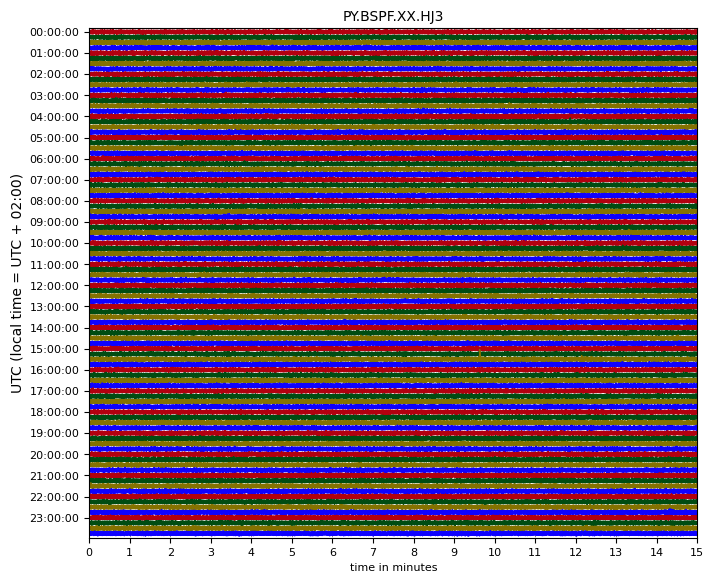

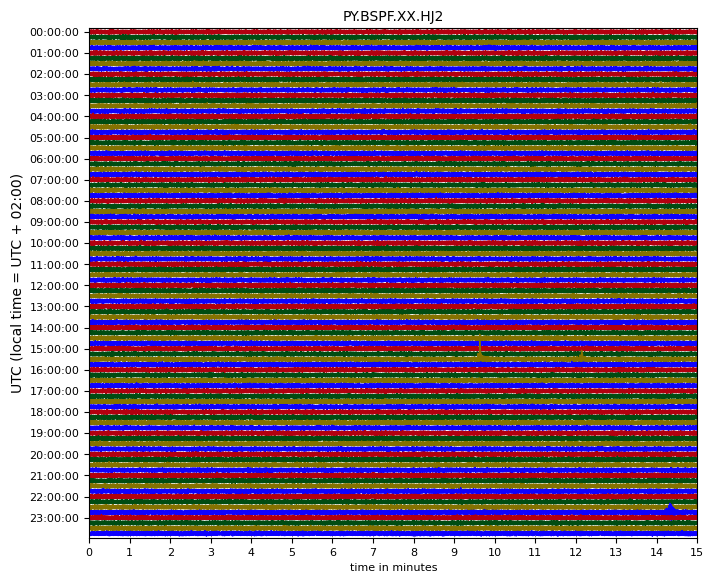

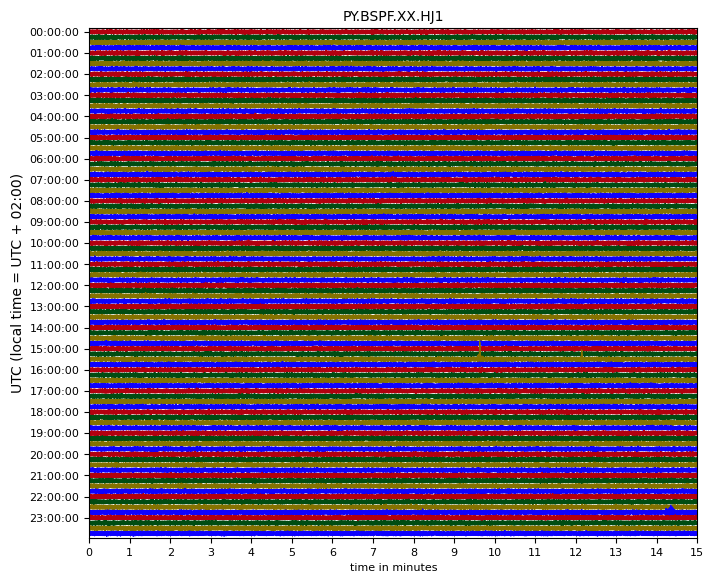

In [6]:
st0[0].plot(type="dayplot");

st0[1].plot(type="dayplot");

st0[2].plot(type="dayplot");

In [7]:
# ii_pfo = client.get_waveforms(network="II", station="PFO", location="10", channel="BH*", 
#                               starttime=t1-60, endtime=t2+60)

# print(ii_pfo)

# pre_filt = [0.005, 0.01, 35, 40]

# ii_pfo.detrend("demean")

# ii_pfo.remove_response(inventory=ii_pfo_inv, 
#                        pre_filt=pre_filt, 
#                        output="VEL",
#                        water_level=60, 
#                        plot=True)


# ii_pfo.trim(t1,t2)

# ii_pfo.detrend("linear")
# ii_pfo.taper(0.1)


# ii_pfo.plot(equal_scale=False);